In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples

n_sample = 1000

# Create circles

X, y =make_circles(n_sample,
                   noise=0.03,
                   random_state=42)

In [ ]:
# check out figures

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


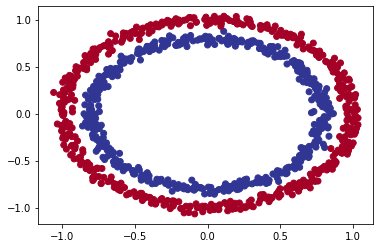

In [ ]:
# Visualize with plot

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y,cmap=plt.cm.RdYlBu )


# Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with

len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(1),

])





model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(1),
       tf.keras.layers.Dense(1)
])





model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

## Improving our model

In [ ]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
       tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(10),
       tf.keras.layers.Dense(1) 

])





model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_3.fit(X, y, epochs=100 , verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [ ]:
# To visualize our models prediction lets create a function

import numpy as np

def plot_decision_boundary(model, X ,y):

  x_min, x_max =X[:, 0].min() - 0.1 , X[:, 0].max() +0.1
  y_min, y_max =X[:, 0].min() - 0.1 , X[:, 0].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  


  # Create X values (er are goig to make prediction on these)
  x_in =np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)
  

  # Check for multiclass

  if len(y_pred[0]) > 1:
    print("Doing multiclass calssification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred =np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
      print("Doing Binary Classification")
      y_pred = np.round(y_pred).reshape(xx.shape)




  # Plot the decision boundary

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y , s=40 , cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())   




Doing Binary Classification


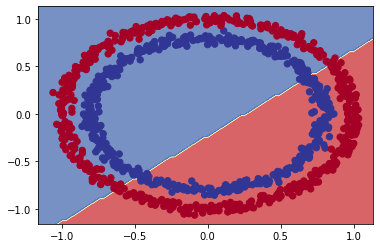

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# The model won't work because of Non-linearity.........look at the linear regression picture....

In [ ]:
# set random seed

tf.random.set_seed(42)

# Create the model

model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                     
])



#compile the model


model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



# Fit the model


history= model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

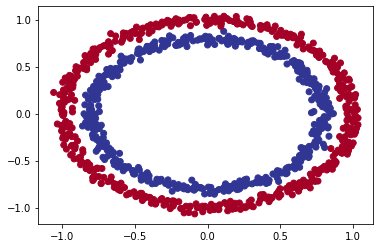

In [ ]:
# Check out our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Doing Binary Classification


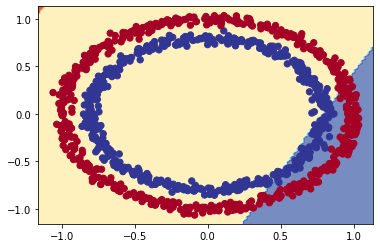

In [ ]:
# check the decision boundary for our latest model

plot_decision_boundary(model_4,
                       X=X,
                       y=y)

In [ ]:
## Neural network with a non linear activation function

# set random seed

tf.random.set_seed(42)

# Create the model

model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                     
])



#compile the model


model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



# Fit the model


history= model_5.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

In [ ]:
# Time to replicate the multi-layer neural network from tensorflow playground in code


tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
         
                               
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



history= model_6.fit(X, y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 3.2091 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4113 - accuracy: 0.1490
Epoch 11/100
32/32 [=

Doing multiclass calssification


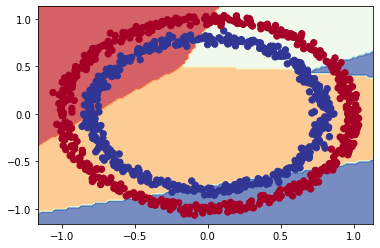

In [ ]:
# how do our model prediction look

plot_decision_boundary(model_6, X, y)

In [ ]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
         
                               
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



history= model_7.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

Doing Binary Classification


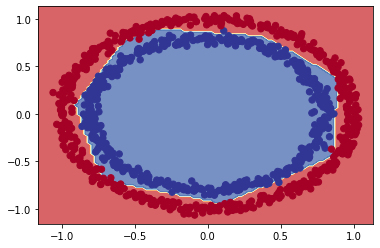

In [ ]:
plot_decision_boundary(model_7,X , y
                       )

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

In [ ]:
# Create a toy tensor(similar to the data we pass into our model)

A =tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

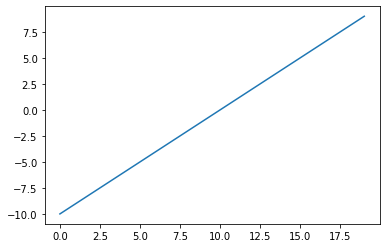

In [ ]:
# Visualize our toy tensor

plt.plot(A);

In [ ]:
# Lets start by replicating sigmoid - sigmoid(x) =1/(1+ exp(-x))


def sigmoid(x):
  return 1/(1+ tf.exp(-x))

# Use the function on our toy tensor


sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

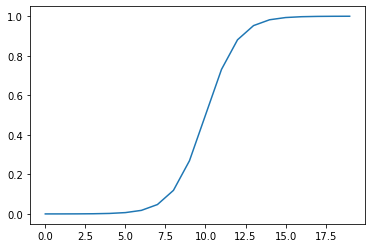

In [ ]:
# Plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A));

In [ ]:
# Lets recreate the relu function

def relu(x):
  return tf.maximum(0,x)


# pass the toy tensor to our custom relu function

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

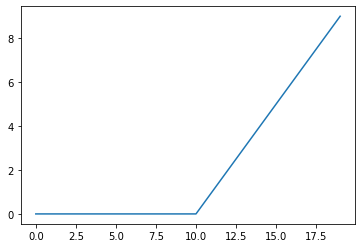

In [ ]:
# plot the relu_modified tensor
plt.plot(relu(A))




In [ ]:
#Let's try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

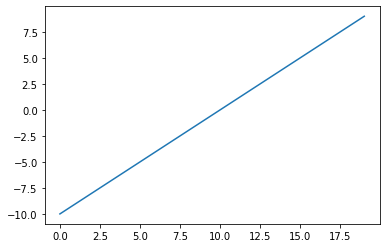

In [ ]:
# Does the linear activation function change anything??

plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change??

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our model

In [ ]:
# Check how many examples we have

len(X)

1000

In [ ]:
# split into train and test sets

X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Let recreate a model to fit on training data and evaluate it on the testing data

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")                     
])


model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])



history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

Doing Binary Classification
Doing Binary Classification


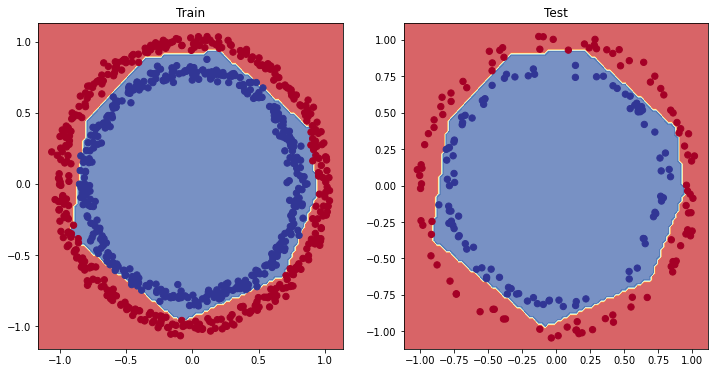

In [ ]:
#Plotting the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();


# Plot the loss(or training) curves

In [ ]:
# Convert the history object into a Dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


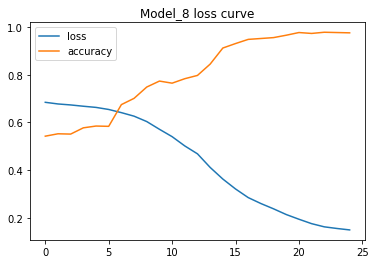

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve");

# Finding the best learning rate

In [ ]:
from gc import callbacks
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
                             
])


model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# Create a  learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model (passing lr_scheduler callback)
history_9 =model_9.fit(X_train,
                           y_train,
                           epochs=100,
                           callbacks=[lr_scheduler])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - ac

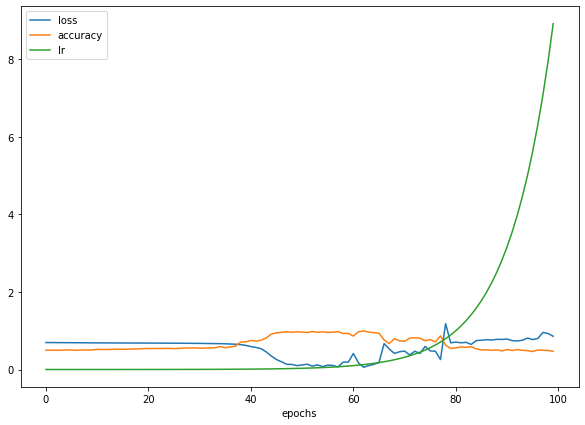

In [ ]:
# Checkout the history

pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

Text(0.5, 1.0, 'Learning date vs. loss')

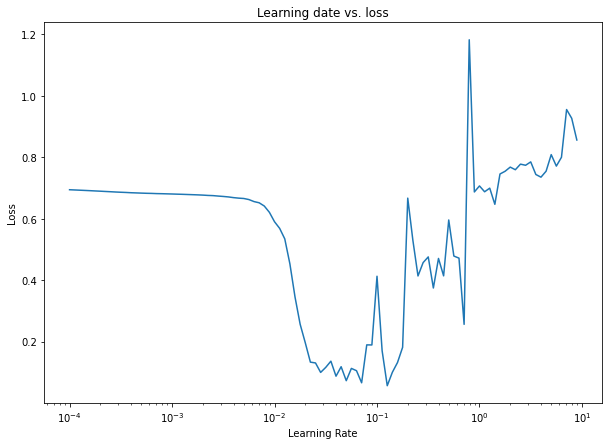

In [ ]:
# plot the learning rate versus the loss

lrs= 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"] )
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning date vs. loss")

In [ ]:
len(lrs)

100

In [ ]:
# Let's try using a higher ideal learning rate with the same model as before 


tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])


model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

Doing Binary Classification
Doing Binary Classification


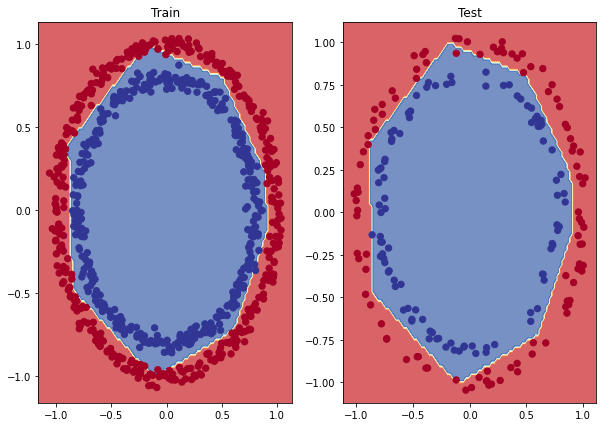

In [ ]:
#plot the decision boundaries for the training and test sets


plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();



## More classification evaluation methods

In [ ]:
 # Check the accuracy of our model

 loss, accuracy = model_10.evaluate(X_test, y_test)
 print(f"Model loss on the test set: {loss}")
 print(f"Model accuracy on the test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00


In [ ]:
# Create a confusion  matrix
from sklearn.metrics import confusion_matrix

# Make predictions

y_preds = model_10.predict(X_test)

# Create confusion matrix

confusion_matrix(y_test, y_preds)


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

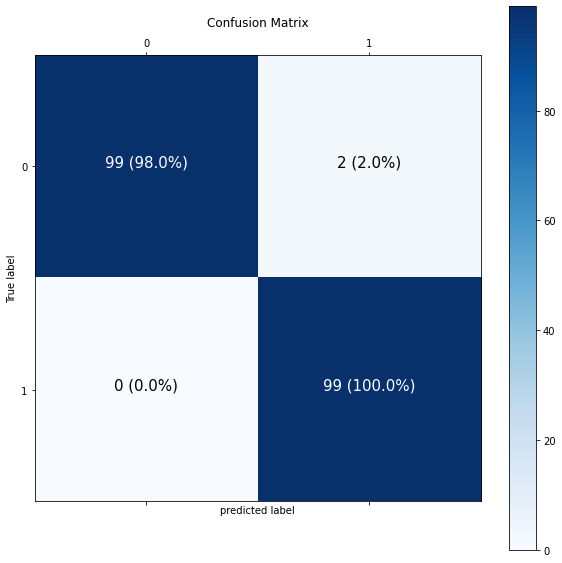

In [ ]:
# Making confusion matrix woth tensorflow

import itertools

figsize = (10, 10)

# Create confusion matrix

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

#Lets prettify it

fig, ax = plt.subplots(figsize=figsize)

# Create matrix plot

cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axis

ax.set(title="Confusion Matrix", 
       xlabel ="predicted label",
       ylabel = "True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels= labels,
       yticklabels=labels)



# set threshold for different colors

threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment= "center",
           color ="white" if cm[i,j]> threshold else "black",
           size=15)



# working with a larger example (multi class classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of a single examples
train_data[0].shape, train_labels[0].shape

((28, 28), ())

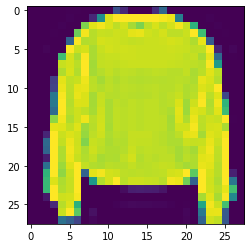

In [ ]:
#plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Create a samll list so we can index our training labels on they're human-readable

class_names = ["tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)






10

Text(0.5, 1.0, 'Coat')

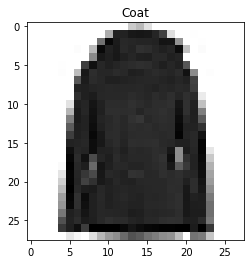

In [ ]:
#Plot an example image and its labels
index_of_choice =2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

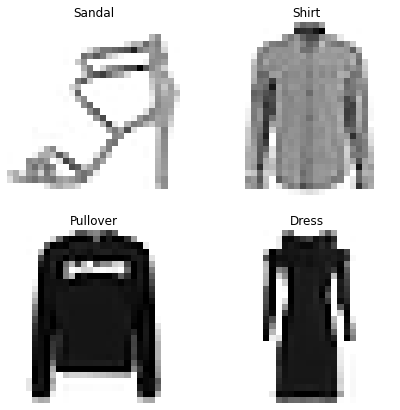

In [ ]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi class classification model

For our multiclass classification model we can use a similar architecture to our binary classifier, however we're going to have to tweak a few things:

* Input shape= 28 x 28 (the shape of one image)
* Output shape =10 (one per class)
* Loss function = tf.keras.categoricalCrossentropy()
* Output layer activation = softmax (not sigmoid)


In [ ]:

# set random seed

tf.random.set_seed(42)



# Create the model


model_11 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),                      
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
          
])


# Compile the model


model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


#fit the model

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                               test_labels,
                               epochs=10,
                              validation_data=(test_data, tf.one_hot(test_labels, depth=10)))
                                


ValueError: ignored

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing them by the maximum

train_data_norm =train_data / 255.0
test_data_norm = test_data  / 255.0

#check the min and max values of scaled  tarining data

train_data_norm.min(), train_data_norm.max()



(0.0, 1.0)

In [ ]:
# model on normalized data

# set random seed

tf.random.set_seed(42)



# Create the model


model_12 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),                      
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
          
])


# Compile the model


model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


#fit the model

non_norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

NameError: ignored

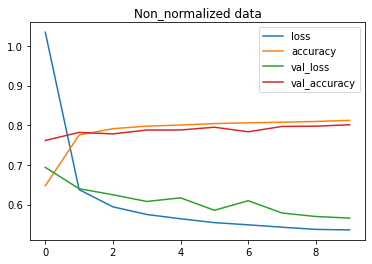

In [ ]:
import pandas as pd
# plot non_normalized data loss curves

pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")

# Plot normalized data loss curves

pd.DataFrame(norm_history.history).plot(title="Normalized data")

# Finding the ideal learning rate

In [ ]:
from sklearn import metrics
# Set the random seed

tf.random.set_seed(42)

# create model

model_13 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(10, activation="softmax")                     
])


#compile the model

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

#Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

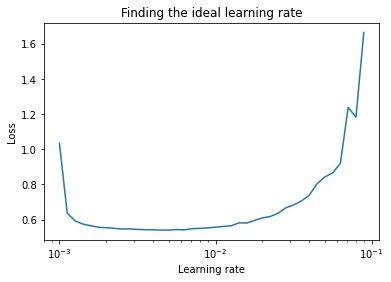

In [ ]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [ ]:
# Let's refit a model with the ideal leanrning rate

# set random seed

tf.random.set_seed(42)


# Create model

model_14 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax")                      
])

#compile the model


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])


# Fit the model


history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data= (test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: